In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
import sys

sys.path.append('..')
from src.data import load_dataset

X, y = load_dataset()
y = y.apply(lambda val: 1 if '>50K' in val else 0)

# Without tuning

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
precision_accum, recall_accum, f1_accum, support_accum = 0, 0, 0, 0

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    precision_accum += precision
    recall_accum += recall
    f1_accum += f1

n_splits = kf.get_n_splits()
print(f"Average Precision: {precision_accum / n_splits:.2f}")
print(f"Average Recall: {recall_accum / n_splits:.2f}")
print(f"Average F1-Score: {f1_accum / n_splits:.2f}")

5it [00:15,  3.09s/it]

Average Precision: 0.86
Average Recall: 0.86
Average F1-Score: 0.86


In [14]:
os.makedirs('../models', exist_ok=True)
joblib.dump(model, '../models/gradient_model.pkl')

['../models/gradient_model.pkl']

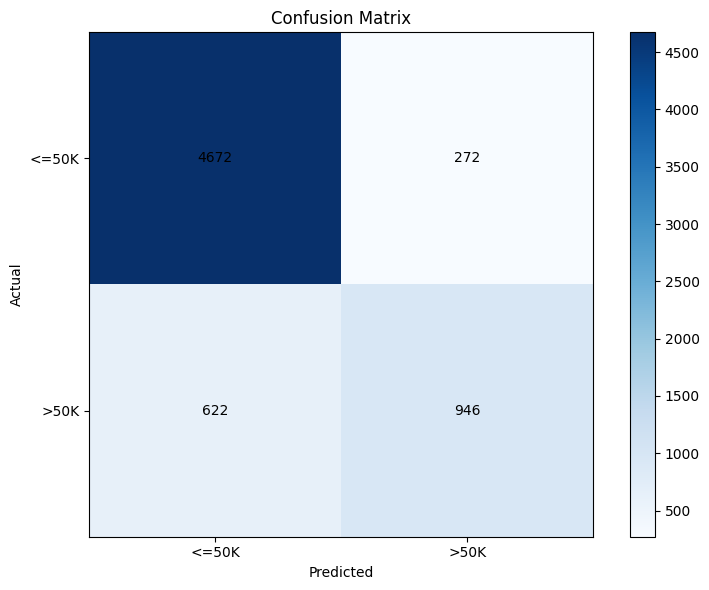

In [15]:


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['<=50K', '>50K']))
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Computing partial dependence plots and individual conditional expectation...


ValueError: Feature 'fnlwgt' not in feature_names

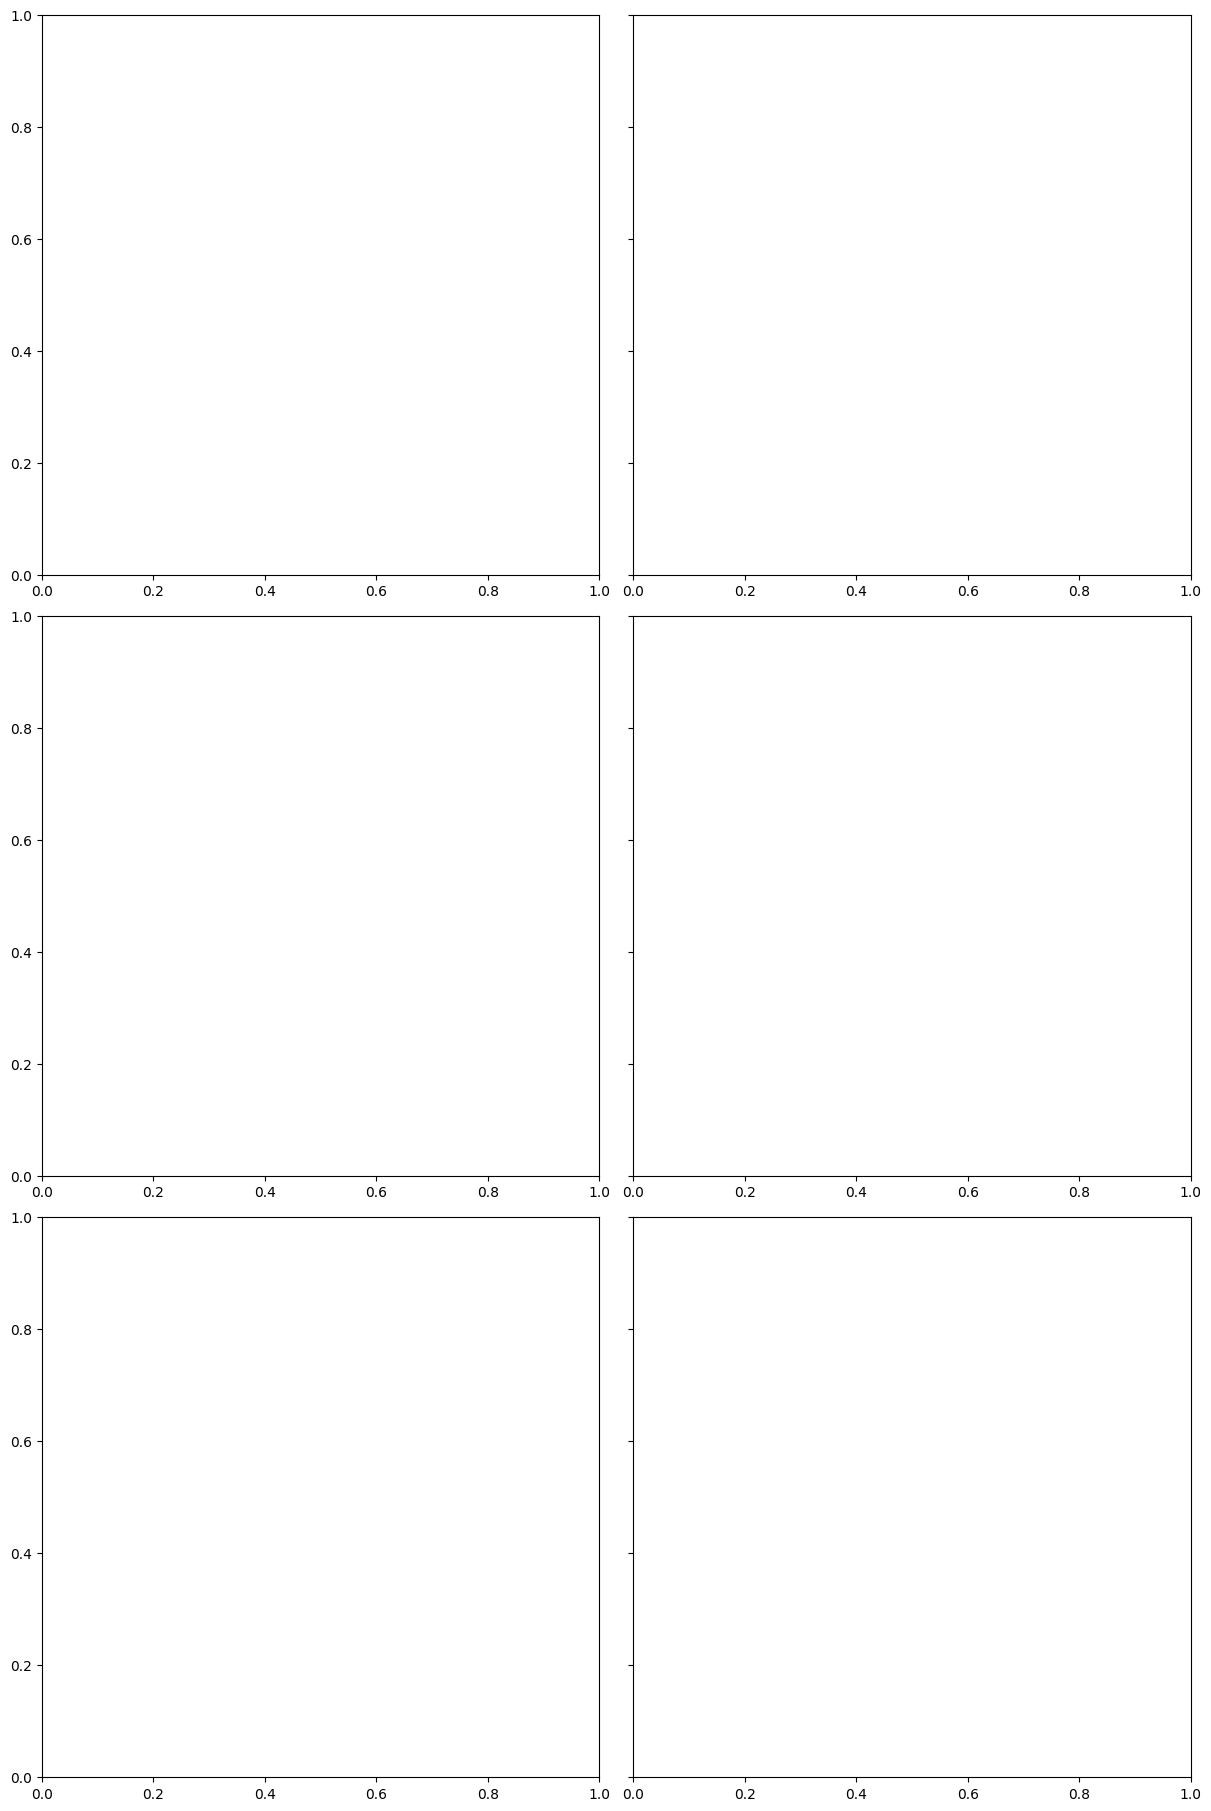

In [16]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 18), sharey=True, constrained_layout=True)

categorical_features = [col for col in X.columns if X[col].dtype == 'bool']
features_info = {
    "features": ['fnlwgt', 'age', 'education_num', 'capital-gain', 'hours-per-week', 'capital-loss'],
    "kind": "both",
    "centered": True,
    "categorical_features": categorical_features
}

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    **features_info,
    ax=ax,
    pd_line_kw={
        "color": "red"
    }
)
_ = display.figure_.suptitle("ICE representations for important numerical features", fontsize=16)

Computing partial dependence plots and individual conditional expectation...


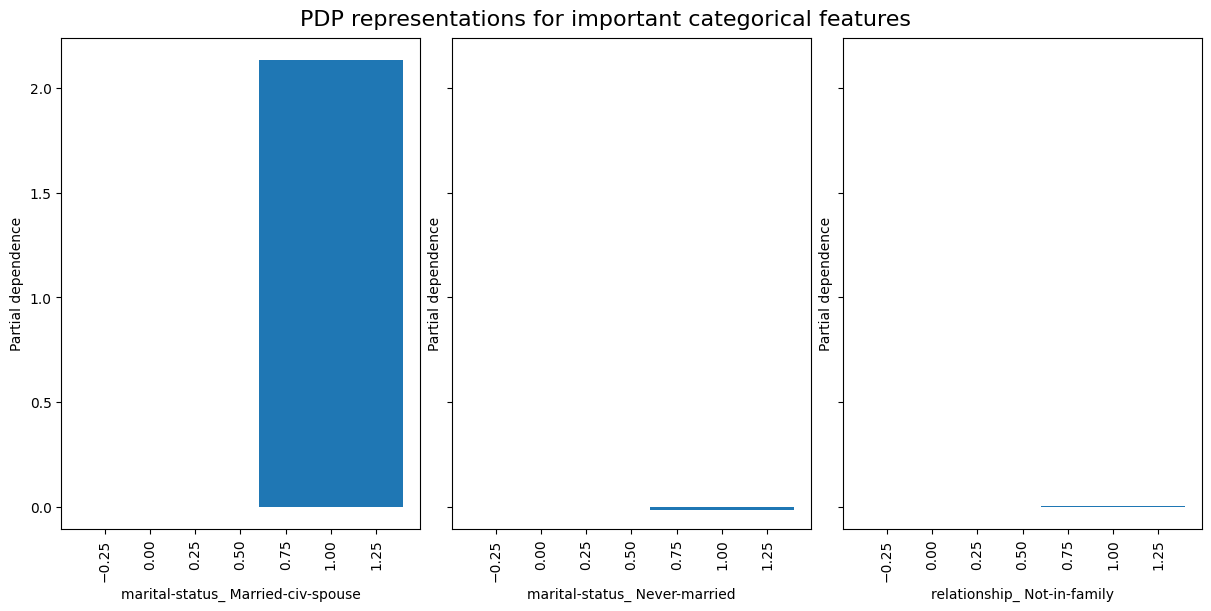

In [17]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=3, figsize=(12, 6), sharey=True, constrained_layout=True)

categorical_features = [col for col in X.columns if X[col].dtype == 'bool']
features_info = {
    "features": ['marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'relationship_ Not-in-family'],
    "kind": "average",
    "centered": True,
    "categorical_features": categorical_features
}

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    **features_info,
    ax=ax,
    pd_line_kw={
        "color": "red"
    }
)
_ = display.figure_.suptitle("PDP representations for important categorical features", fontsize=16)